In [1]:
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import display, Image

**Some of the images used for training**

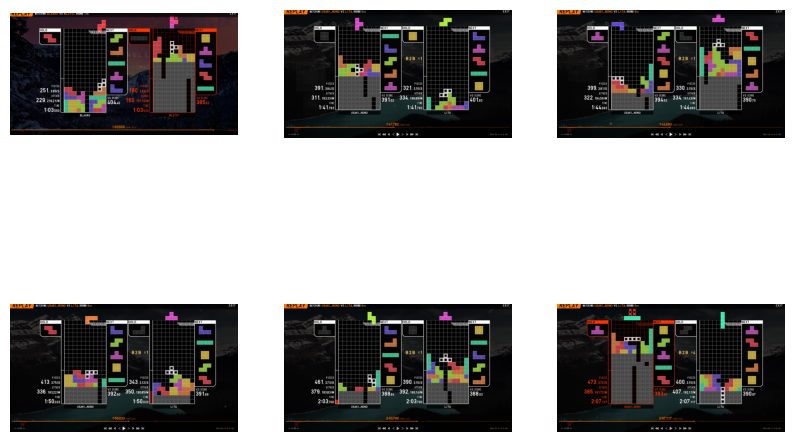

In [2]:
directory = "images"

image_files = os.listdir(directory)
image_files.sort()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

for i, image_file in enumerate(image_files[:6]):
    image_path = os.path.join(directory, image_file)
    image = plt.imread(image_path)
    ax = axes[i // 3, i % 3]
    ax.imshow(image)
    ax.axis("off")

plt.show()

**Import YOLOv8n, the smallest YOLOv8 model for faster training and predicting**

In [3]:
model = YOLO('yolov8n.pt')

**After testing the model, 30 Epochs was found to be the best before minimal improvement started to occur**

In [4]:
model.train(data='data.yaml',epochs=30,imgsz=800,plots=True)

New https://pypi.org/project/ultralytics/8.0.117 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.114  Python-3.9.13 torch-2.0.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torc

       8/30         0G     0.7662     0.7728     0.9324         11        800: 100%|██████████| 20/20 [04:05<00:00, 12.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0
                   all         29         38      0.972          1      0.982      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/30         0G     0.7584     0.7109      0.933         11        800: 100%|██████████| 20/20 [03:47<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0
                   all         29         38      0.973          1       0.98      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/30         0G     0.7451     0.6558     0.9259         22        800: 100%|██████████| 20/20 [03:45<00:00, 11.
                 Class     Images  Instances      Box(P         

      28/30         0G     0.5666     0.3672     0.8729         13        800: 100%|██████████| 20/20 [03:50<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0
                   all         29         38      0.973          1      0.992       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      29/30         0G     0.5726     0.3732     0.8616         18        800: 100%|██████████| 20/20 [03:52<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0
                   all         29         38      0.973          1      0.994      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      30/30         0G     0.5535      0.357     0.8698         20        800: 100%|██████████| 20/20 [03:49<00:00, 11.
                 Class     Images  Instances      Box(P         

**Results after training & validation**
* After only around 5-10 epochs the model seems to become fairly accurate

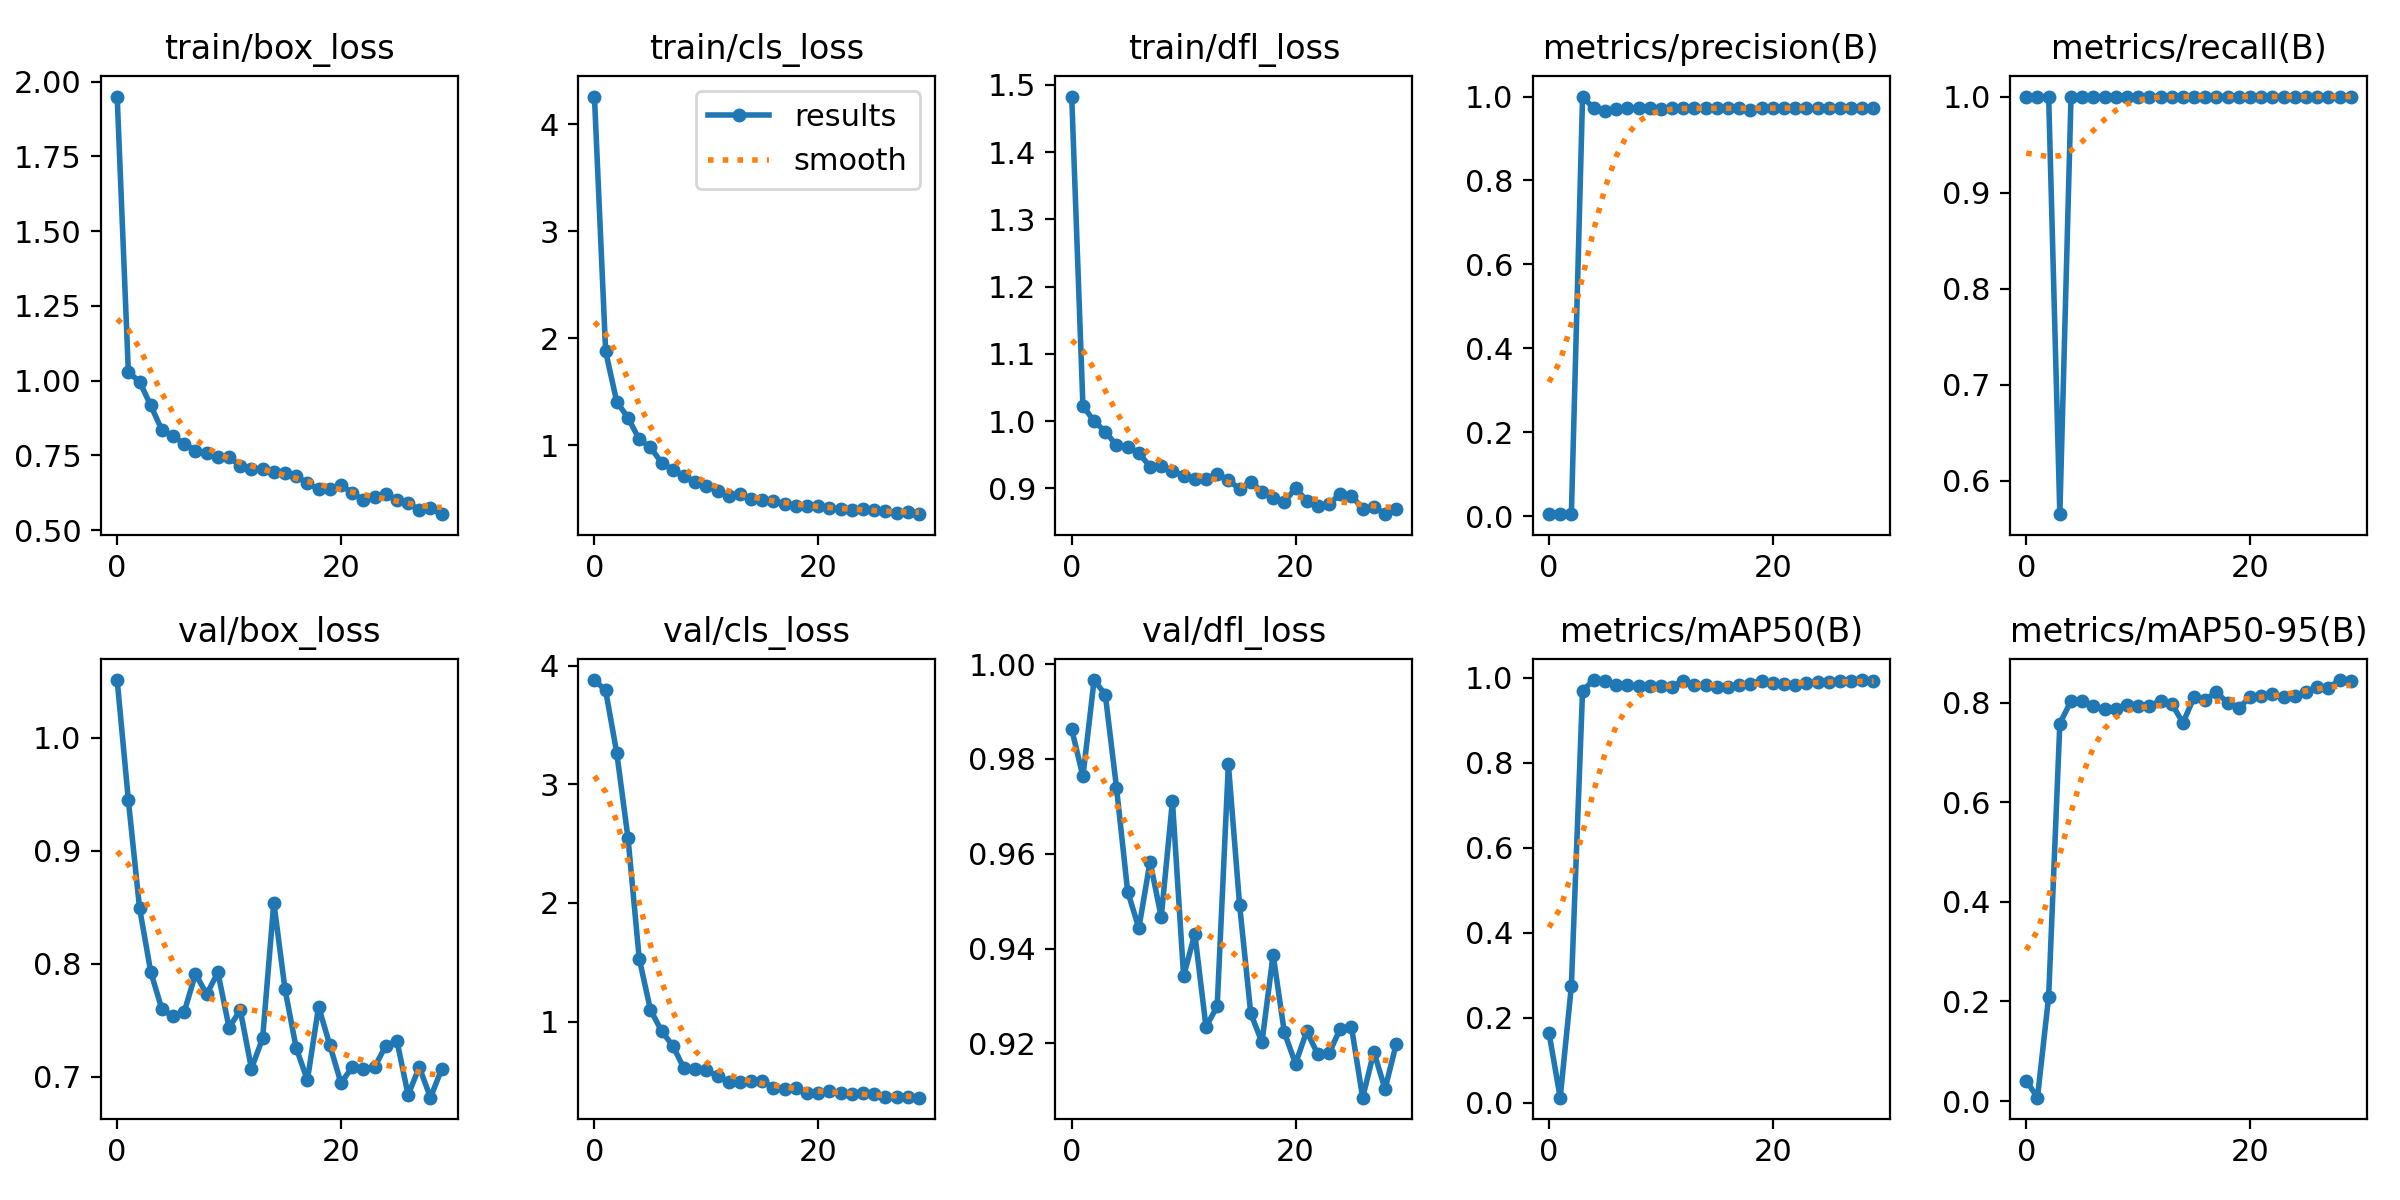

In [5]:
Image(filename='runs/detect/train/results.png', width=600)

**Detection in validation images**
* Model accurately detect most, if not all, of the tspins in the validation set
* Model is also 90% confident in all of the bounding boxes being tspins which is very good

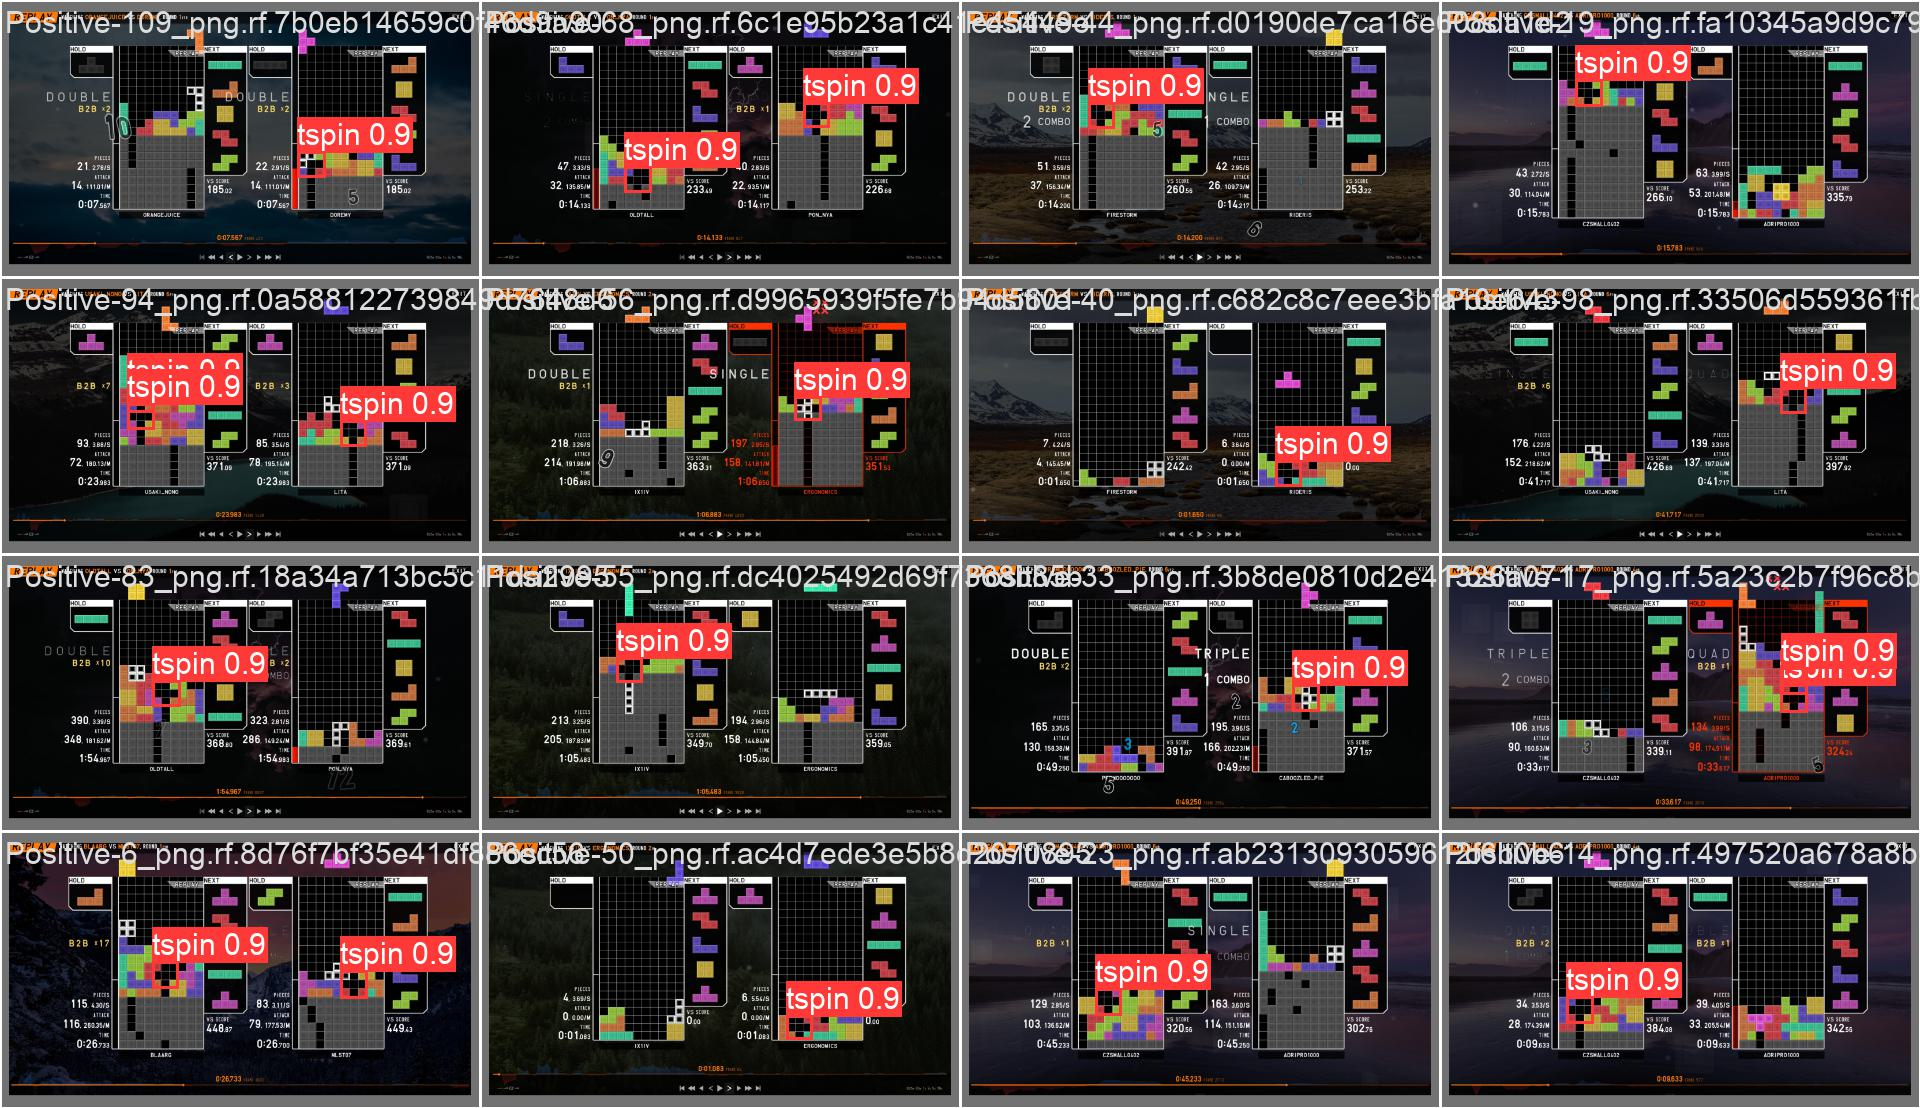

In [6]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=800)

**Using the model to detect tspins in an actual 1v1**

In [7]:
model.predict(source='blaarg v diao.mp4' ,conf=0.8, save=True)



    WARNING  stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 759.3ms
video 1/1 (2/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 445.4ms
video 1/1 (3/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 363.1ms
video 1/

video 1/1 (52/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 224.1ms
video 1/1 (53/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 216.5ms
video 1/1 (54/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 216.5ms
video 1/1 (55/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 232.6ms
video 1/1 (56/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 223.3ms
video 1/1 (57/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 197.0ms
video 1/1 (58/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspi

video 1/1 (108/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 172.5ms
video 1/1 (109/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 174.4ms
video 1/1 (110/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 181.0ms
video 1/1 (111/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 233.5ms
video 1/1 (112/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 268.7ms
video 1/1 (113/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 209.1ms
video 1/1 (114/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 

video 1/1 (164/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 362.9ms
video 1/1 (165/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 401.8ms
video 1/1 (166/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 452.8ms
video 1/1 (167/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 452.2ms
video 1/1 (168/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 415.3ms
video 1/1 (169/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 374.8ms
video 1/1 (170/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detecti

video 1/1 (220/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 226.2ms
video 1/1 (221/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 321.6ms
video 1/1 (222/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 310.4ms
video 1/1 (223/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 428.6ms
video 1/1 (224/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 381.4ms
video 1/1 (225/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 407.6ms
video 1/1 (226/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projec

video 1/1 (276/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 188.2ms
video 1/1 (277/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 184.1ms
video 1/1 (278/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 319.8ms
video 1/1 (279/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 368.3ms
video 1/1 (280/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 324.6ms
video 1/1 (281/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 408.0ms
video 1/1 (282/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 

video 1/1 (333/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 191.7ms
video 1/1 (334/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 165.3ms
video 1/1 (335/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 192.7ms
video 1/1 (336/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 204.2ms
video 1/1 (337/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 196.4ms
video 1/1 (338/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 236.9ms
video 1/1 (339/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 

video 1/1 (388/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 359.6ms
video 1/1 (389/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 398.5ms
video 1/1 (390/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 183.9ms
video 1/1 (391/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 251.7ms
video 1/1 (392/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 366.8ms
video 1/1 (393/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 171.5ms
video 1/1 (394/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projec

video 1/1 (442/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 235.6ms
video 1/1 (443/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 241.5ms
video 1/1 (444/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 365.1ms
video 1/1 (445/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 431.9ms
video 1/1 (446/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 167.0ms
video 1/1 (447/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 273.7ms
video 1/1 (448/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 

video 1/1 (499/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 208.9ms
video 1/1 (500/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 296.9ms
video 1/1 (501/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 161.6ms
video 1/1 (502/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 199.2ms
video 1/1 (503/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 290.6ms
video 1/1 (504/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 259.9ms
video 1/1 (505/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 

video 1/1 (555/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 385.9ms
video 1/1 (556/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 194.1ms
video 1/1 (557/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 156.9ms
video 1/1 (558/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 159.4ms
video 1/1 (559/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 195.6ms
video 1/1 (560/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 174.1ms
video 1/1 (561/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaar

video 1/1 (609/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 364.0ms
video 1/1 (610/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 358.4ms
video 1/1 (611/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 237.1ms
video 1/1 (612/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 302.2ms
video 1/1 (613/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 261.6ms
video 1/1 (614/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 307.1ms
video 1/1 (615/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projec

video 1/1 (663/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 172.6ms
video 1/1 (664/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 290.6ms
video 1/1 (665/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 326.3ms
video 1/1 (666/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 326.4ms
video 1/1 (667/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 386.4ms
video 1/1 (668/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 391.6ms
video 1/1 (669/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projec

video 1/1 (718/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 324.1ms
video 1/1 (719/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 284.0ms
video 1/1 (720/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 192.0ms
video 1/1 (721/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 457.2ms
video 1/1 (722/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 462.3ms
video 1/1 (723/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 444.5ms
video 1/1 (724/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projec

video 1/1 (773/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 375.6ms
video 1/1 (774/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 308.2ms
video 1/1 (775/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 438.7ms
video 1/1 (776/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 385.0ms
video 1/1 (777/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 454.5ms
video 1/1 (778/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 453.3ms
video 1/1 (779/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 

video 1/1 (830/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 265.7ms
video 1/1 (831/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 206.1ms
video 1/1 (832/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 199.5ms
video 1/1 (833/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 202.3ms
video 1/1 (834/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 193.5ms
video 1/1 (835/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 198.3ms
video 1/1 (836/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 

video 1/1 (887/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 394.4ms
video 1/1 (888/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 380.9ms
video 1/1 (889/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 382.2ms
video 1/1 (890/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 412.8ms
video 1/1 (891/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 439.8ms
video 1/1 (892/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 394.7ms
video 1/1 (893/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 

video 1/1 (944/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 399.2ms
video 1/1 (945/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 306.3ms
video 1/1 (946/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 339.8ms
video 1/1 (947/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 351.9ms
video 1/1 (948/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 390.7ms
video 1/1 (949/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 319.4ms
video 1/1 (950/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projec

video 1/1 (1000/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 2 tspins, 470.1ms
video 1/1 (1001/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 2 tspins, 326.1ms
video 1/1 (1002/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 2 tspins, 345.8ms
video 1/1 (1003/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 2 tspins, 443.0ms
video 1/1 (1004/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 2 tspins, 297.5ms
video 1/1 (1005/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 2 tspins, 338.8ms
video 1/1 (1006/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp

video 1/1 (1054/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 175.4ms
video 1/1 (1055/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 455.4ms
video 1/1 (1056/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 473.3ms
video 1/1 (1057/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 382.0ms
video 1/1 (1058/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 468.8ms
video 1/1 (1059/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 325.1ms
video 1/1 (1060/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (1109/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 479.2ms
video 1/1 (1110/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 467.6ms
video 1/1 (1111/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 423.5ms
video 1/1 (1112/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 361.4ms
video 1/1 (1113/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 317.0ms
video 1/1 (1114/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 395.6ms
video 1/1 (1115/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg

video 1/1 (1164/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 161.4ms
video 1/1 (1165/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 166.9ms
video 1/1 (1166/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 424.8ms
video 1/1 (1167/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 408.9ms
video 1/1 (1168/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 460.7ms
video 1/1 (1169/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 425.4ms
video 1/1 (1170/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detectio

video 1/1 (1218/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 474.6ms
video 1/1 (1219/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 209.2ms
video 1/1 (1220/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 159.8ms
video 1/1 (1221/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 359.9ms
video 1/1 (1222/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 428.5ms
video 1/1 (1223/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 471.5ms
video 1/1 (1224/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (1272/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 394.7ms
video 1/1 (1273/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 461.6ms
video 1/1 (1274/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 397.6ms
video 1/1 (1275/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 190.0ms
video 1/1 (1276/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 379.7ms
video 1/1 (1277/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 437.5ms
video 1/1 (1278/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (1326/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 465.0ms
video 1/1 (1327/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 441.9ms
video 1/1 (1328/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 465.2ms
video 1/1 (1329/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 473.7ms
video 1/1 (1330/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 453.8ms
video 1/1 (1331/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 422.0ms
video 1/1 (1332/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (1381/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 369.3ms
video 1/1 (1382/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 421.5ms
video 1/1 (1383/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 450.6ms
video 1/1 (1384/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 463.4ms
video 1/1 (1385/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 455.3ms
video 1/1 (1386/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 442.1ms
video 1/1 (1387/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448

video 1/1 (1435/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 262.4ms
video 1/1 (1436/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 317.6ms
video 1/1 (1437/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 375.8ms
video 1/1 (1438/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 219.1ms
video 1/1 (1439/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 377.6ms
video 1/1 (1440/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 261.4ms
video 1/1 (1441/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (1489/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 463.3ms
video 1/1 (1490/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 449.5ms
video 1/1 (1491/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 502.0ms
video 1/1 (1492/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 454.7ms
video 1/1 (1493/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 446.1ms
video 1/1 (1494/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 442.5ms
video 1/1 (1495/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448

video 1/1 (1544/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 425.9ms
video 1/1 (1545/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 186.7ms
video 1/1 (1546/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 289.3ms
video 1/1 (1547/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 448.6ms
video 1/1 (1548/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 400.9ms
video 1/1 (1549/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 436.4ms
video 1/1 (1550/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (1598/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 442.3ms
video 1/1 (1599/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 348.4ms
video 1/1 (1600/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 429.5ms
video 1/1 (1601/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 478.9ms
video 1/1 (1602/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 293.7ms
video 1/1 (1603/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 331.1ms
video 1/1 (1604/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (1652/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 427.0ms
video 1/1 (1653/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 438.6ms
video 1/1 (1654/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 458.7ms
video 1/1 (1655/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 466.4ms
video 1/1 (1656/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 440.4ms
video 1/1 (1657/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 477.2ms
video 1/1 (1658/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (1706/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 301.0ms
video 1/1 (1707/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 470.7ms
video 1/1 (1708/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 255.0ms
video 1/1 (1709/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 279.6ms
video 1/1 (1710/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 418.0ms
video 1/1 (1711/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 409.1ms
video 1/1 (1712/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (1761/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 168.9ms
video 1/1 (1762/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 207.7ms
video 1/1 (1763/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 209.8ms
video 1/1 (1764/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 176.6ms
video 1/1 (1765/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 163.4ms
video 1/1 (1766/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 169.3ms
video 1/1 (1767/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (1815/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 171.8ms
video 1/1 (1816/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 224.6ms
video 1/1 (1817/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 184.2ms
video 1/1 (1818/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 224.2ms
video 1/1 (1819/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 181.5ms
video 1/1 (1820/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 184.5ms
video 1/1 (1821/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (1870/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 2 tspins, 188.5ms
video 1/1 (1871/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 2 tspins, 180.6ms
video 1/1 (1872/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 2 tspins, 310.6ms
video 1/1 (1873/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 2 tspins, 366.4ms
video 1/1 (1874/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 2 tspins, 267.6ms
video 1/1 (1875/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 2 tspins, 364.3ms
video 1/1 (1876/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp

video 1/1 (1925/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 184.7ms
video 1/1 (1926/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 367.4ms
video 1/1 (1927/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 373.1ms
video 1/1 (1928/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 286.5ms
video 1/1 (1929/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 184.5ms
video 1/1 (1930/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 311.3ms
video 1/1 (1931/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (1979/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 404.7ms
video 1/1 (1980/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 432.1ms
video 1/1 (1981/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 380.1ms
video 1/1 (1982/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 357.2ms
video 1/1 (1983/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 242.3ms
video 1/1 (1984/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 371.5ms
video 1/1 (1985/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (2033/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 352.1ms
video 1/1 (2034/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 469.1ms
video 1/1 (2035/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 446.3ms
video 1/1 (2036/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 424.8ms
video 1/1 (2037/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 334.0ms
video 1/1 (2038/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 410.5ms
video 1/1 (2039/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (2087/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 449.7ms
video 1/1 (2088/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 426.9ms
video 1/1 (2089/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 407.4ms
video 1/1 (2090/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 383.3ms
video 1/1 (2091/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 439.5ms
video 1/1 (2092/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 408.5ms
video 1/1 (2093/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Project

video 1/1 (2142/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 434.4ms
video 1/1 (2143/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 475.3ms
video 1/1 (2144/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 448.1ms
video 1/1 (2145/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 479.3ms
video 1/1 (2146/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 209.4ms
video 1/1 (2147/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 389.8ms
video 1/1 (2148/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (2196/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 321.1ms
video 1/1 (2197/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 469.6ms
video 1/1 (2198/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 401.2ms
video 1/1 (2199/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 386.5ms
video 1/1 (2200/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 425.3ms
video 1/1 (2201/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 314.2ms
video 1/1 (2202/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448

video 1/1 (2252/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 412.8ms
video 1/1 (2253/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 386.1ms
video 1/1 (2254/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 389.4ms
video 1/1 (2255/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 463.0ms
video 1/1 (2256/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 452.5ms
video 1/1 (2257/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 197.0ms
video 1/1 (2258/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (2307/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 184.1ms
video 1/1 (2308/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 311.3ms
video 1/1 (2309/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 432.2ms
video 1/1 (2310/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 447.8ms
video 1/1 (2311/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 458.3ms
video 1/1 (2312/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 455.4ms
video 1/1 (2313/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448

video 1/1 (2363/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 444.4ms
video 1/1 (2364/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 423.9ms
video 1/1 (2365/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 423.4ms
video 1/1 (2366/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 395.0ms
video 1/1 (2367/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 413.0ms
video 1/1 (2368/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 449.5ms
video 1/1 (2369/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (2419/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 268.8ms
video 1/1 (2420/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 194.2ms
video 1/1 (2421/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 379.0ms
video 1/1 (2422/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 373.5ms
video 1/1 (2423/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 400.3ms
video 1/1 (2424/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 447.7ms
video 1/1 (2425/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448

video 1/1 (2476/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 428.0ms
video 1/1 (2477/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 406.1ms
video 1/1 (2478/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 430.3ms
video 1/1 (2479/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 433.4ms
video 1/1 (2480/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 467.2ms
video 1/1 (2481/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 464.9ms
video 1/1 (2482/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (2530/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 395.7ms
video 1/1 (2531/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 457.5ms
video 1/1 (2532/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 449.0ms
video 1/1 (2533/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 483.0ms
video 1/1 (2534/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 488.4ms
video 1/1 (2535/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 449.0ms
video 1/1 (2536/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (2584/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 266.4ms
video 1/1 (2585/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 392.6ms
video 1/1 (2586/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 432.3ms
video 1/1 (2587/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 398.8ms
video 1/1 (2588/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 401.9ms
video 1/1 (2589/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 211.4ms
video 1/1 (2590/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (2638/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 251.3ms
video 1/1 (2639/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 347.6ms
video 1/1 (2640/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 321.0ms
video 1/1 (2641/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 363.5ms
video 1/1 (2642/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 361.6ms
video 1/1 (2643/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 386.7ms
video 1/1 (2644/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (2693/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 259.1ms
video 1/1 (2694/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 1 tspin, 291.5ms
video 1/1 (2695/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 418.3ms
video 1/1 (2696/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 394.1ms
video 1/1 (2697/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 407.5ms
video 1/1 (2698/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 481.8ms
video 1/1 (2699/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin 

video 1/1 (2747/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 445.5ms
video 1/1 (2748/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 173.2ms
video 1/1 (2749/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 385.8ms
video 1/1 (2750/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 413.7ms
video 1/1 (2751/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 275.2ms
video 1/1 (2752/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 364.9ms
video 1/1 (2753/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (2801/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 188.7ms
video 1/1 (2802/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 318.6ms
video 1/1 (2803/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 169.1ms
video 1/1 (2804/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 169.4ms
video 1/1 (2805/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 183.2ms
video 1/1 (2806/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 176.7ms
video 1/1 (2807/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (2855/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 164.7ms
video 1/1 (2856/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 176.3ms
video 1/1 (2857/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 216.5ms
video 1/1 (2858/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 190.0ms
video 1/1 (2859/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 165.6ms
video 1/1 (2860/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 182.9ms
video 1/1 (2861/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (2909/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 200.4ms
video 1/1 (2910/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 183.6ms
video 1/1 (2911/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 369.9ms
video 1/1 (2912/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 270.5ms
video 1/1 (2913/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 218.3ms
video 1/1 (2914/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 177.0ms
video 1/1 (2915/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (2964/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 228.9ms
video 1/1 (2965/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 194.3ms
video 1/1 (2966/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 248.0ms
video 1/1 (2967/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 233.6ms
video 1/1 (2968/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 264.3ms
video 1/1 (2969/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 226.1ms
video 1/1 (2970/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

video 1/1 (3018/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 218.9ms
video 1/1 (3019/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 209.0ms
video 1/1 (3020/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 154.1ms
video 1/1 (3021/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 196.3ms
video 1/1 (3022/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 259.6ms
video 1/1 (3023/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science-Projects\Tspin Detection\blaarg v diao.mp4: 448x800 (no detections), 173.7ms
video 1/1 (3024/3042) C:\Users\miste\Documents\Jupyter-Notebook\Data-Science

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'tspin'}
 orig_img: array([[[0, 0, 8],
         [0, 0, 8],
         [0, 0, 7],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 8],
         [0, 0, 8],
         [0, 0, 7],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[2, 0, 5],
         [2, 0, 5],
         [1, 0, 4],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[2, 0, 0],
         [2, 0, 0],
         [2, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[2, 0, 0],
         [2, 0, 0],
         [2, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[2, 0, 0],
         [2, 0, 0],
         [2, 0, 0],
         ...,
         [0, 0, 0],
        